# Importing libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load the dataset

In [13]:
df = pd.read_csv('/content/ai_job_dataset.csv')
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


# Overview of shape, types, and stats

In [14]:
print("Dataset Shape:", df.shape)
df.info()
df.describe(include='all').T

Dataset Shape: (15000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_dat

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
job_id,15000,15000,AI15000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,15000,20,Machine Learning Researcher,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_usd,15000.0,NaN,NaN,NaN,115348.965133,60260.940438,32519.0,70179.75,99705.0,146408.5,399095.0
salary_currency,15000,3,USD,11957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience_level,15000,4,MI,3781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,15000,4,FT,3812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,15000,20,Germany,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,15000,3,S,5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee_residence,15000,20,Sweden,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,15000.0,NaN,NaN,NaN,49.483333,40.812712,0.0,0.0,50.0,100.0,100.0


# Checking for missing values

In [15]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

,0


In [16]:
# Convert date columns
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
df['application_deadline'] = pd.to_datetime(df['application_deadline'], errors='coerce')

# Decode categorical columns
df['experience_level'] = df['experience_level'].map({
    'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'
})

df['employment_type'] = df['employment_type'].map({
    'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'
})


# Exploring job titles and experience distribution

In [17]:
print(df['job_title'].value_counts().head(10))
print(df['experience_level'].value_counts())
print(df['employment_type'].value_counts())

job_title
Machine Learning Researcher    808
AI Software Engineer           784
Autonomous Systems Engineer    777
Machine Learning Engineer      772
AI Architect                   771
Head of AI                     765
NLP Engineer                   762
Robotics Engineer              759
Data Analyst                   759
AI Research Scientist          756
Name: count, dtype: int64
experience_level
Mid          3781
Executive    3760
Senior       3741
Entry        3718
Name: count, dtype: int64
employment_type
Full-time    3812
Freelance    3758
Contract     3721
Part-time    3709
Name: count, dtype: int64


# Salary distribution with KDE

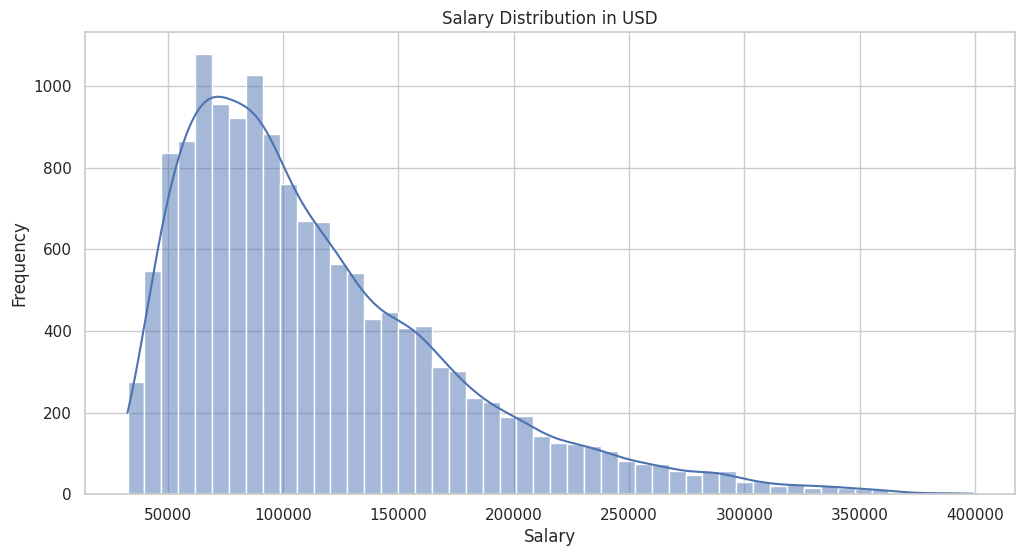

In [18]:
sns.histplot(df['salary_usd'], bins=50, kde=True)
plt.title('Salary Distribution in USD')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Average salary by company location

Text(0.5, 0, 'Average Salary (USD)')

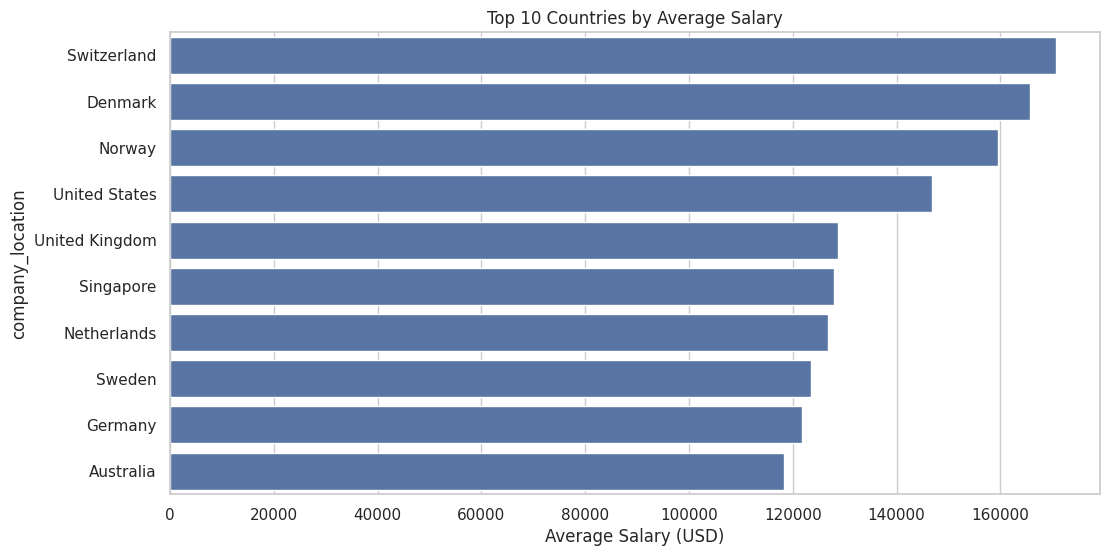

In [19]:
country_salary = df.groupby('company_location')['salary_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=country_salary.values, y=country_salary.index)
plt.title('Top 10 Countries by Average Salary')
plt.xlabel('Average Salary (USD)')

# Salary by experience level

<ipython-input-20-c4a941998f6d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='experience_level', y='salary_usd', data=df, palette='Set2')


Text(0, 0.5, 'Salary (USD)')

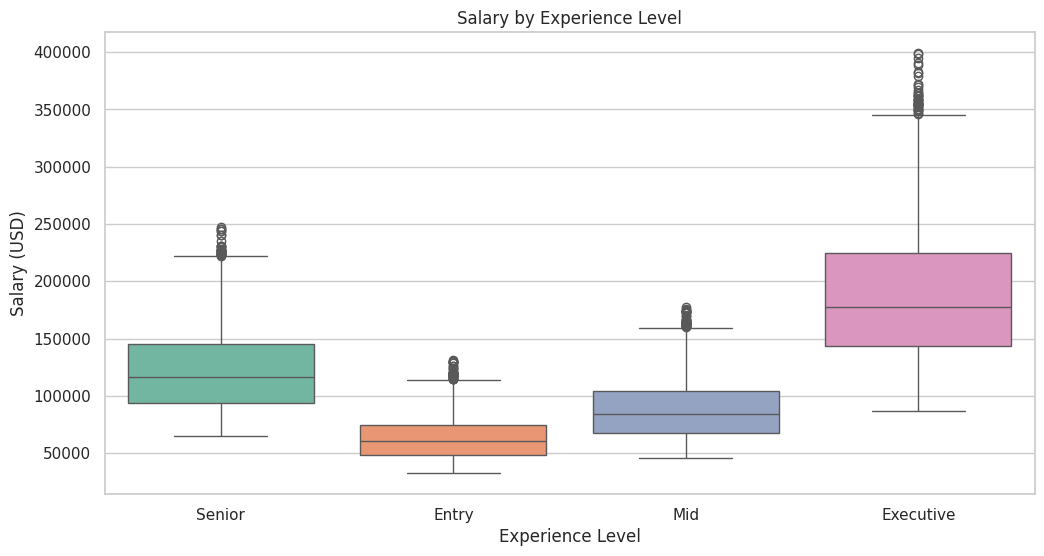

In [20]:
sns.boxplot(x='experience_level', y='salary_usd', data=df, palette='Set2')
plt.title('Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')

# Word Cloud for Skills

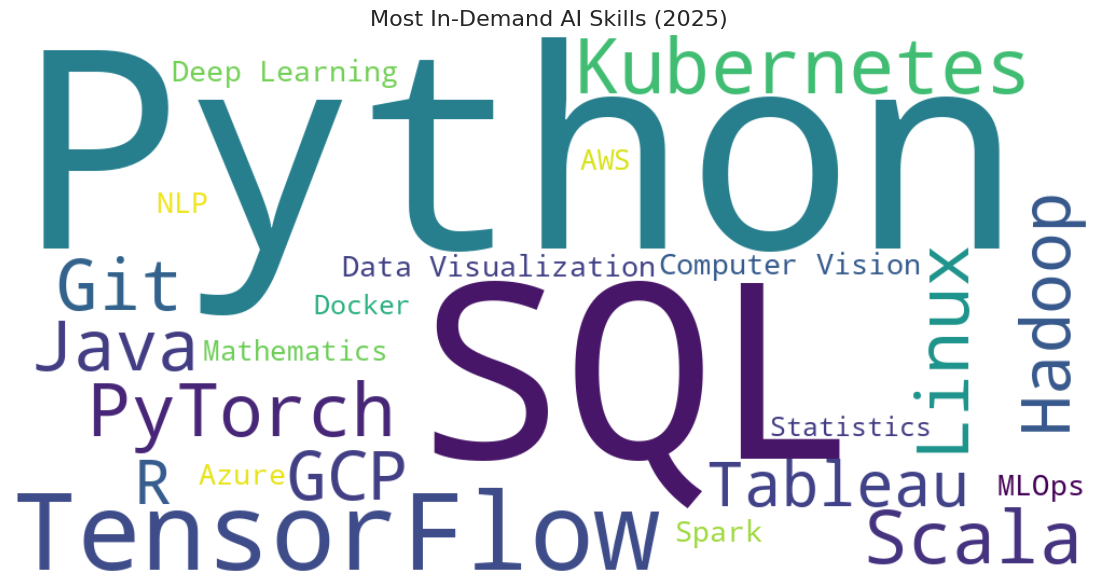

In [21]:
from collections import Counter

all_skills = df['required_skills'].str.cat(sep=', ').split(', ')
skill_freq = Counter(all_skills)
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(skill_freq)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most In-Demand AI Skills (2025)', fontsize=16)
plt.show()

# Remote Work Ratio

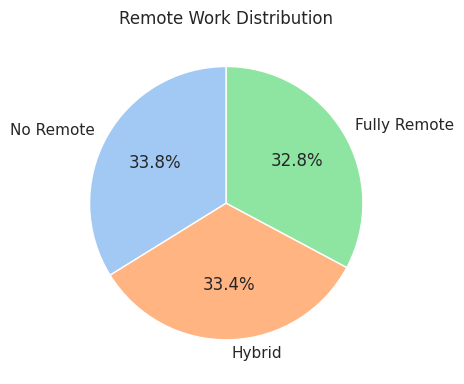

In [25]:
plt.figure(figsize=(6, 4))
df['remote_ratio'].value_counts().sort_index().plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=['No Remote', 'Hybrid', 'Fully Remote'],
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title("Remote Work Distribution")
plt.ylabel('')
plt.tight_layout()
plt.show()

# Company size and average salary

<ipython-input-23-5158ebfead02>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='company_size', y='salary_usd', data=df, palette='pastel')


Text(0.5, 1.0, 'Company Size vs Salary')

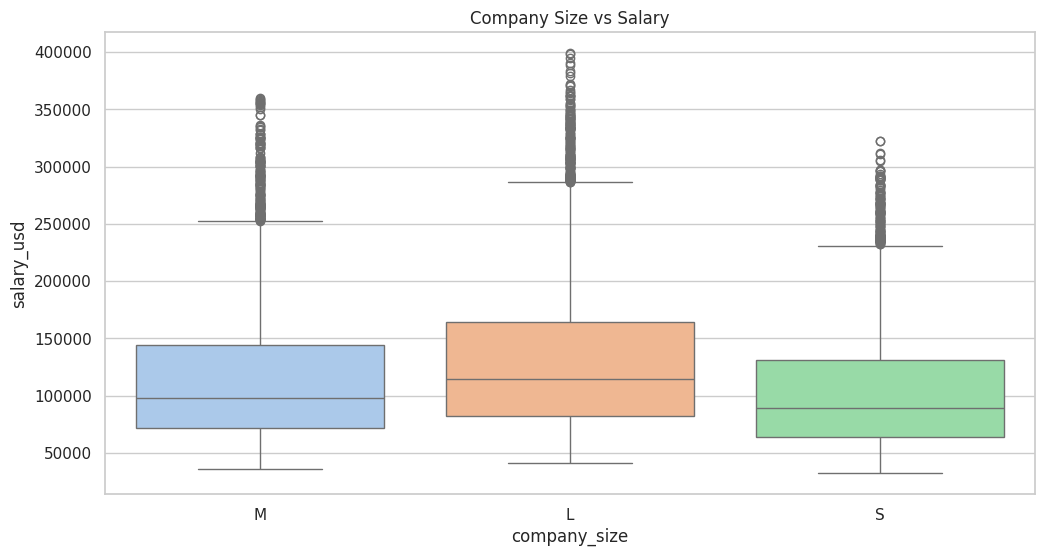

In [23]:
sns.boxplot(x='company_size', y='salary_usd', data=df, palette='pastel')
plt.title('Company Size vs Salary')